# K-means - choosing the number of clusters (K)

To choose the best number of clusters for K-means clustering, you can use the Elbow Method or the Silhouette Score. Both methods provide a way to determine the optimal number of clusters by evaluating the clustering performance for different numbers of clusters.

In [12]:
#!pip install yellowbrick

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

# Set random seed for reproducibility
np.random.seed(42)

In [5]:
# Generate synthetic data for normal transactions
normal_transactions = np.random.normal(loc=[100, 30], scale=[20, 10], size=(200, 2))

# Generate synthetic data for anomalous transactions
anomalous_transactions = np.array([[250, 60], [300, 70], [350, 80]])

# Combine the data and create a DataFrame
data = np.vstack([normal_transactions, anomalous_transactions])
df = pd.DataFrame(data, columns=['Amount', 'Duration'])

# Generate synthetic data for the third feature (Frequency)
normal_frequency = np.random.normal(loc=15, scale=5, size=200)
anomalous_frequency = np.array([35, 40, 45])

# Combine the data for the third feature
frequency_data = np.concatenate([normal_frequency, anomalous_frequency])
df['Frequency'] = frequency_data
df

,Amount,Duration,Frequency
0,68.111447,24.006250,19.691419
1,100.104874,30.469806,12.419776
2,90.998691,36.228499,15.480604
3,78.647591,28.576205,12.688624
4,102.405913,35.144388,12.827519
...,...,...,...
198,99.208897,36.815007,12.144105
199,100.566368,30.297561,17.862914
200,250.000000,60.000000,35.000000
201,300.000000,70.000000,40.000000


## Elbow Method

The Elbow Method involves plotting the sum of squared distances (inertia) of samples to their closest cluster center for different numbers of clusters. The point where the plot starts to bend (the "elbow") is considered to be the optimal number of clusters.

In the Elbow Method plot, look for a point where the curve starts to bend, indicating a diminishing return in the reduction of inertia. This point is considered the optimal number of clusters. 

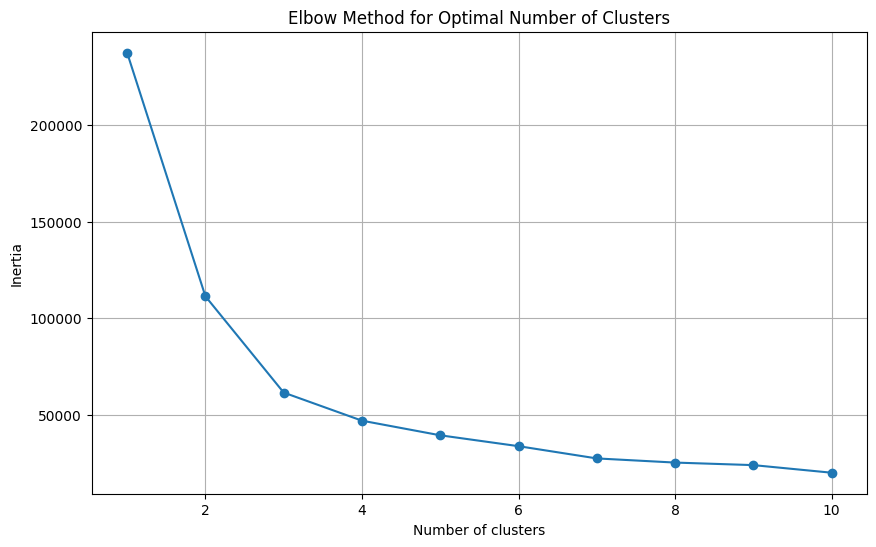

In [6]:
# Calculate the sum of squared distances (inertia) for different numbers of clusters
inertias = []
for k in range(1, 11):  # Assuming we want to test from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Amount', 'Duration', 'Frequency']])
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


## Silhouette Score

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. The range of the Silhouette Score is [-1, 1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

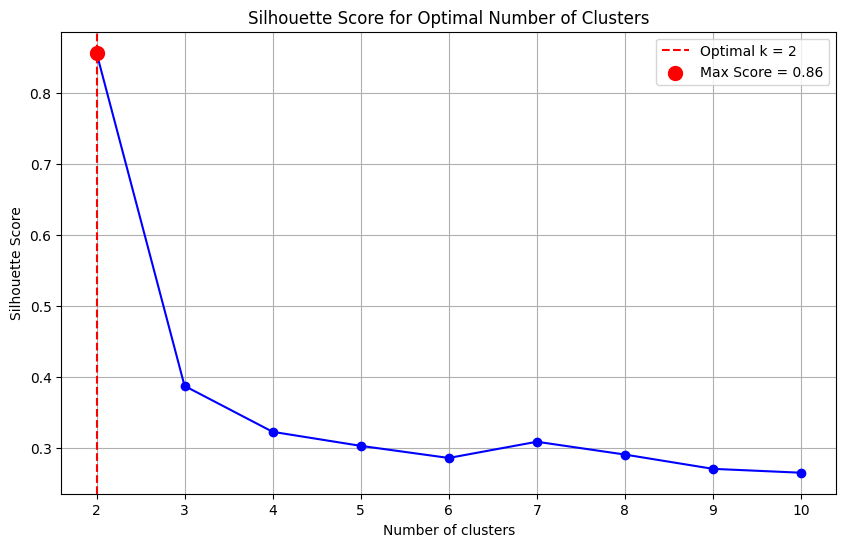

In [10]:
# Calculate the silhouette score for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not defined for a single cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df[['Amount', 'Duration', 'Frequency']])
    score = silhouette_score(df[['Amount', 'Duration', 'Frequency']], labels)
    silhouette_scores.append(score)

# Find the number of clusters with the maximum silhouette score
optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]

# Plot the Silhouette scores with annotations
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='blue')
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal k = {optimal_k}')
plt.scatter(optimal_k, max(silhouette_scores), color='red', s=100, zorder=5, label=f'Max Score = {max(silhouette_scores):.2f}')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

The optimal number of clusters is the one that maximizes the Silhouette Score or is located at the "elbow" point in the Elbow Method. 

The `yellowbrick` library provides a convenient way to visualize the Silhouette Scores for different numbers of clusters using the `SilhouetteVisualizer`. 

Here's how you can use it:

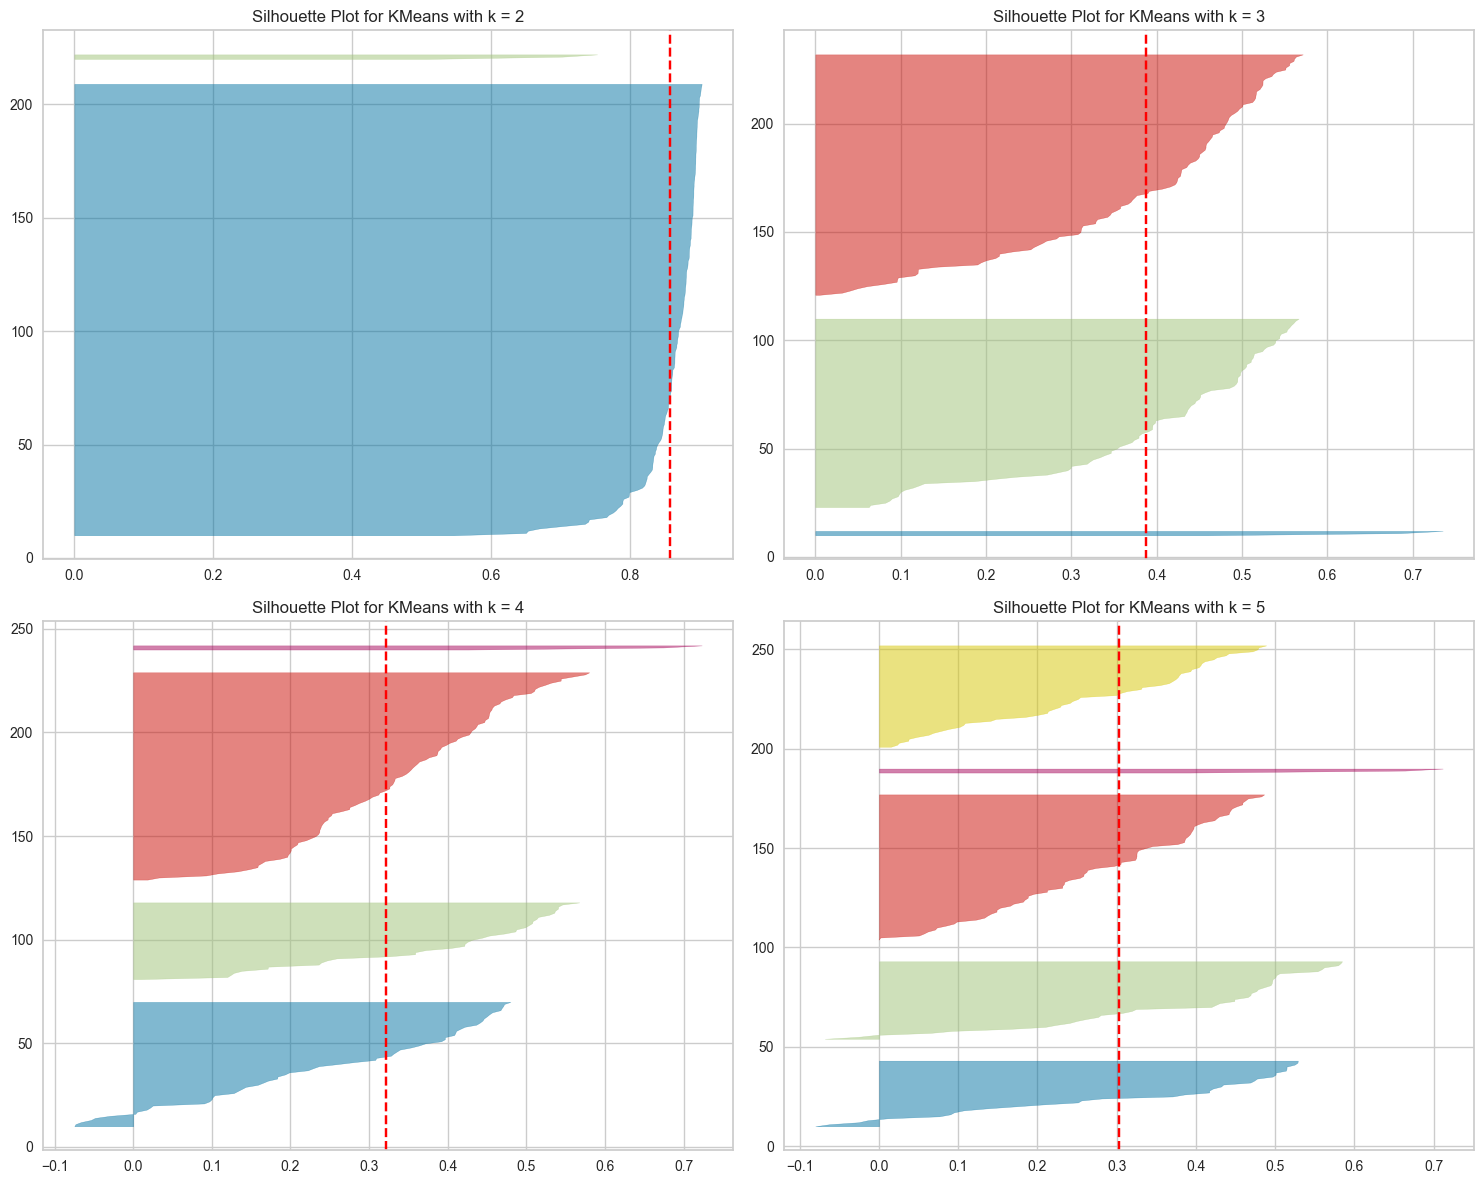

In [14]:
# Create a figure to hold multiple plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Iterate over different numbers of clusters and plot the silhouette visualizer
for k, ax in zip([2, 3, 4, 5], axes.flatten()):
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Initialize the SilhouetteVisualizer with the KMeans model
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit the data and visualize the silhouette score
    visualizer.fit(df[['Amount', 'Duration', 'Frequency']])

    # Set the title
    ax.set_title(f'Silhouette Plot for KMeans with k = {k}')

plt.tight_layout()
plt.show()


In this example, we create a 2x2 grid of plots, each showing the silhouette scores for a different number of clusters (from 2 to 5). The SilhouetteVisualizer displays the silhouette score for each sample as well as the average silhouette score for the entire dataset, providing a visual representation of how well each sample fits into its assigned cluster.

In the Silhouette Score plots, look for the following:

- The silhouette score ranges from -1 to 1. A score close to 1 indicates that the sample is far away from its neighboring clusters.
- The thickness of the silhouette plot represents the size of the cluster.
- A good clustering solution will have well above-average silhouette scores, minimal fluctuations, and all the clusters will be of similar thickness.

The optimal number of clusters is typically the one that maximizes the average silhouette score while ensuring that the individual scores are consistent and the cluster sizes are balanced.

## Elbow Method with Yellowbrick


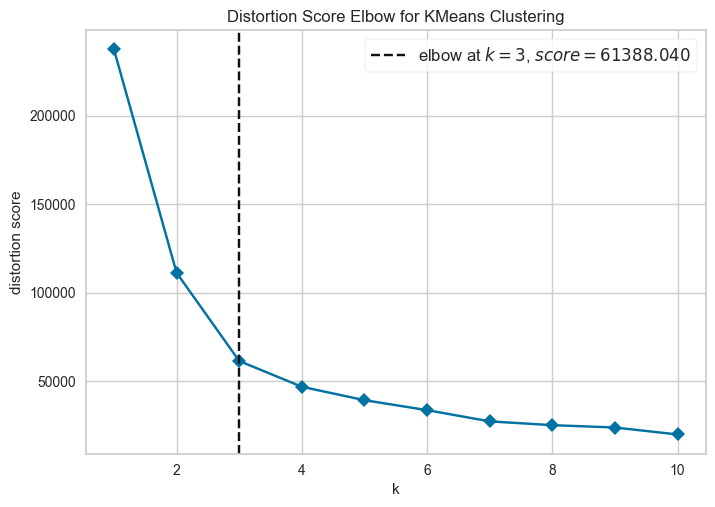

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Instantiate the KElbowVisualizer with KMeans and the Elbow method
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1,11), timings=False)

# Fit the data and show the plot
visualizer.fit(df[['Amount', 'Duration', 'Frequency']])
visualizer.show()

In the Elbow Method plot, look for a point where the curve starts to bend, indicating a diminishing return in the reduction of inertia. This point is considered the optimal number of clusters. The `KElbowVisualizer` automatically annotates this point on the plot.

# Interpretation and Choosing the Optimal Number of Clusters

- **Elbow Method**: Choose the number of clusters where the inertia (sum of squared distances) starts to decrease at a slower rate, forming an "elbow" in the plot.
- **Silhouette Score**: Look for a configuration where the average silhouette score is high, and the individual scores are consistent across clusters. The optimal number of clusters should maximize the average silhouette score and provide balanced cluster sizes.